##Installing and Importing Libraries

In [ ]:
!pip install librosa
!pip install scipy
!pip install matplotlib

In [ ]:
# Import Libraries
import numpy as np
import librosa
import librosa.display
from scipy.spatial.distance import cosine
import matplotlib.pyplot as plt

## Import and load Suspected Audio file



In [ ]:
# Load Audio Files
def load_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    return audio, sr

##Audio data Normalization

In [ ]:
# Preprocess Audio: Normalize the audio signal
def normalize_audio(audio):
    return librosa.util.normalize(audio)

##Extracting features

In [ ]:
# Extract MFCC Features
def extract_mfcc(audio, sr, n_mfcc=13):
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    mfccs = np.mean(mfccs.T, axis=0)  # Average over time for compact representation
    return mfccs

##Load and Normalizing the Records Sampled Audio File

In [ ]:
# Load and normalize two audio samples
suspect_audio ,sr = load_audio('suspect_audio.wav')
audio_record_1, sr1 = load_audio('record1.wav')
audio_record_2, sr2 = load_audio('record2.wav')
audio_record_3, sr3 = load_audio('record3.wav')


<ipython-input-40-8bdf0e8f47a6>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
##normalize the audio:
suspect_audio = normalize_audio(suspect_audio)
audio_record_1 = normalize_audio(audio_record_1)
audio_record_2 = normalize_audio(audio_record_2)
audio_record_3 = normalize_audio(audio_record_3)

##Extract the Features of Records Audio Files

In [ ]:
# Extract MFCC features for both audio samples
suspect_audio= extract_mfcc(suspect_audio, sr)
mfcc_record_1 = extract_mfcc(audio_record_1, sr1)
mfcc_record_2 = extract_mfcc(audio_record_2, sr2)
mfcc_record_3 = extract_mfcc(audio_record_3, sr3)


##Comparing the Records with the Suspected Audio File (usig cosine similarity)

In [ ]:
# Calculate cosine similarities between all pairs of samples
similarities = {}
for i, sample in enumerate([ mfcc_record_1, mfcc_record_2, mfcc_record_3]):
    similarity = 1 - cosine(suspect_audio,sample)
    similarities["record"+str(i+1)] = similarity

print("Similarities between samples:")
for key, value in similarities.items():
    print(f"suspect_audio vs {key}: {value}")




Similarities between samples:
suspect_audio vs record1: 0.9955009996481073
suspect_audio vs record2: 0.9811471040767166
suspect_audio vs record3: 0.9903705300970765


In [ ]:
# Find the pair with the highest similarity
best_match = max(similarities, key=similarities.get)

# Print the results


print(f"\nBest match: {best_match[0]} and {best_match[1]} (Similarity: {similarities[best_match]})")



Best match: r and e (Similarity: 0.9955009996481073)


## Result:

In [ ]:
# Check if all similarities are above the threshold
threshold = 0.8
all_same_person = all(similarity > threshold for similarity in similarities.values())

# Print the result
if all_same_person:
    print("All audio samples are likely from the same person.")
else:
    print("The audio samples are likely from different people.")

All audio samples are likely from the same person.


##Visualization of result:

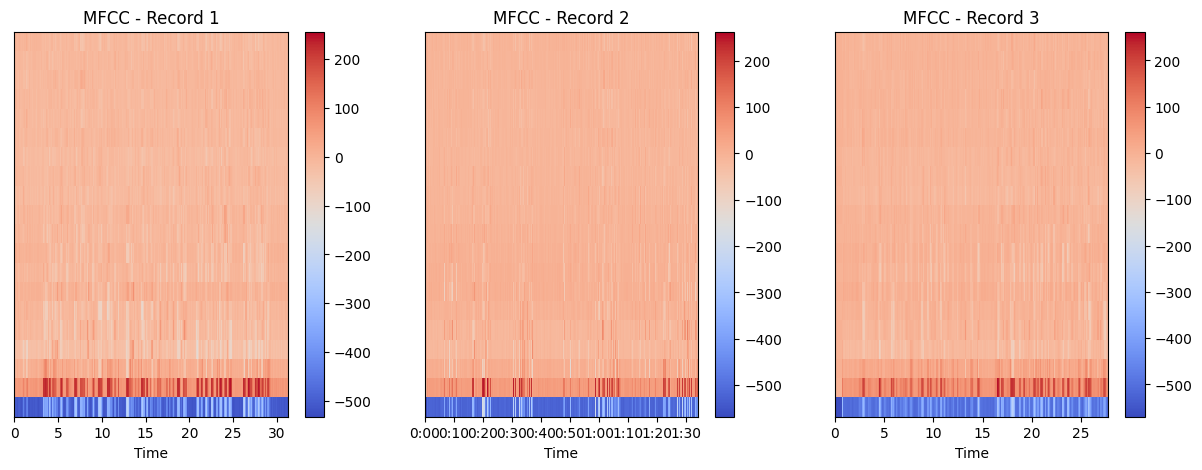

In [ ]:
# Visualize MFCCs for inspection
plt.figure(figsize=(15,5))
plt.subplot(1,3, 1)
librosa.display.specshow(librosa.feature.mfcc(y=audio_record_1, sr=sr1), x_axis='time')
plt.colorbar()
plt.title('MFCC - Record 1')

plt.subplot(1,3, 2)
librosa.display.specshow(librosa.feature.mfcc(y=audio_record_2, sr=sr2), x_axis='time')
plt.colorbar()
plt.title('MFCC - Record 2')


plt.subplot(1,3, 3)
librosa.display.specshow(librosa.feature.mfcc(y=audio_record_3, sr=sr3), x_axis='time')
plt.colorbar()
plt.title('MFCC - Record 3')

plt.show()

#One shot Implementation:

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=13
  warnings.warn(


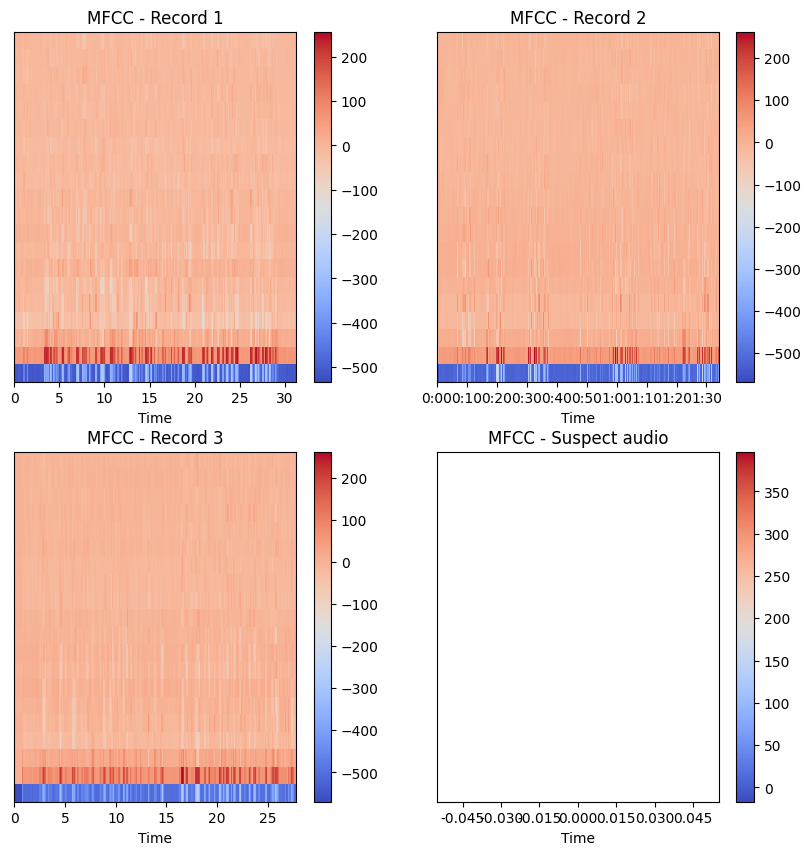

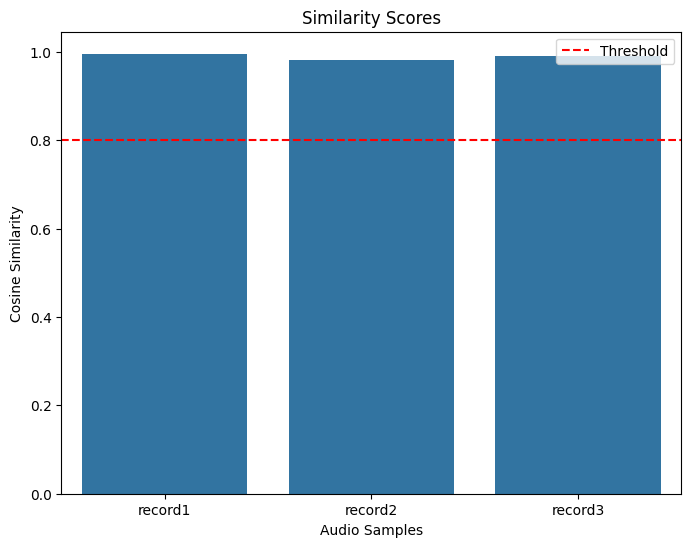


Best match: record1 (Similarity: 0.9955009996481073)
All audio samples are likely from the same person.


In [ ]:
import matplotlib.pyplot as plt
import librosa.display
import seaborn as sns

# Assuming you have already calculated similarities and best_match as in your code

# Visualize MFCCs for inspection
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
librosa.display.specshow(librosa.feature.mfcc(y=audio_record_1, sr=sr1), x_axis='time')
plt.colorbar()
plt.title('MFCC - Record 1')

plt.subplot(2, 2, 2)
librosa.display.specshow(librosa.feature.mfcc(y=audio_record_2, sr=sr2), x_axis='time')
plt.colorbar()
plt.title('MFCC - Record 2')

plt.subplot(2, 2, 3)
librosa.display.specshow(librosa.feature.mfcc(y=audio_record_3, sr=sr3), x_axis='time')
plt.colorbar()
plt.title('MFCC - Record 3')



# Visualize similarity scores using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=list(similarities.keys()), y=list(similarities.values()))
plt.title('Similarity Scores')
plt.xlabel('Audio Samples')
plt.ylabel('Cosine Similarity')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()

# Print the best match and overall interpretation
print(f"\nBest match: {best_match} (Similarity: {similarities[best_match]})")

threshold = 0.8
all_same_person = all(similarity > threshold for similarity in similarities.values())

if all_same_person:
    print("All audio samples are likely from the same person.")
else:
    print("The audio samples are likely from different people.")